In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("data/CellProfiler.pkl", "rb") as in_file:
    cp_results = pickle.load(in_file)
    
with open("data/pretrained_features.pkl", "rb") as in_file:
    pre_results = pickle.load(in_file)
    
with open("data/trained_features.pkl", "rb") as in_file:
    tra_results = pickle.load(in_file)

# Enrichment Analysis

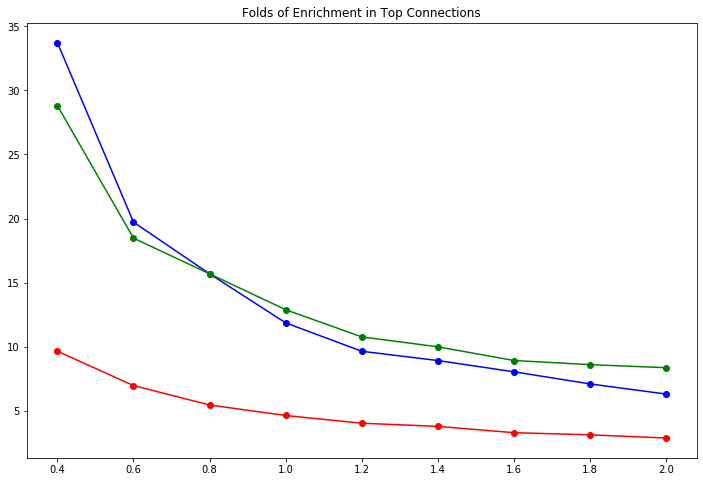

In [3]:
plt.figure(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100-cp_results["enrichment"]["percentile"], cp_results["enrichment"]["ods_ratio"], marker="o", color="red")
plt.plot(100-pre_results["enrichment"]["percentile"], pre_results["enrichment"]["ods_ratio"], marker="o", color="blue")
plt.plot(100-tra_results["enrichment"]["percentile"], tra_results["enrichment"]["ods_ratio"], marker="o", color="green")

# Average Precision

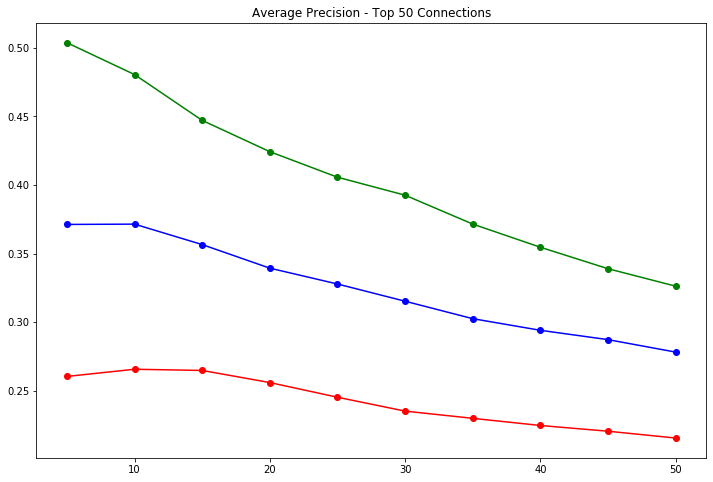

In [4]:
plt.figure(figsize=(12,8))
plt.title("Average Precision - Top 50 Connections")
plt.plot(cp_results["ranking"], cp_results["avg_precision"], marker="o", color="red")
plt.plot(pre_results["ranking"], pre_results["avg_precision"], marker="o", color="blue")
plt.plot(tra_results["ranking"], tra_results["avg_precision"], marker="o", color="green")

# Recall at top connections

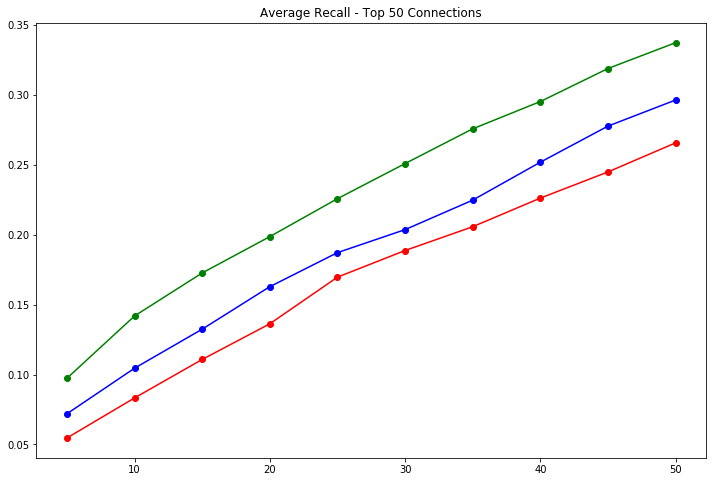

In [5]:
plt.figure(figsize=(12,8))
plt.title("Average Recall - Top 50 Connections")
plt.plot(cp_results["ranking"], cp_results["recall"], marker="o", color="red")
plt.plot(pre_results["ranking"], pre_results["recall"], marker="o", color="blue")
plt.plot(tra_results["ranking"], tra_results["recall"], marker="o", color="green")

# Interpolated Recall-Precision Curve

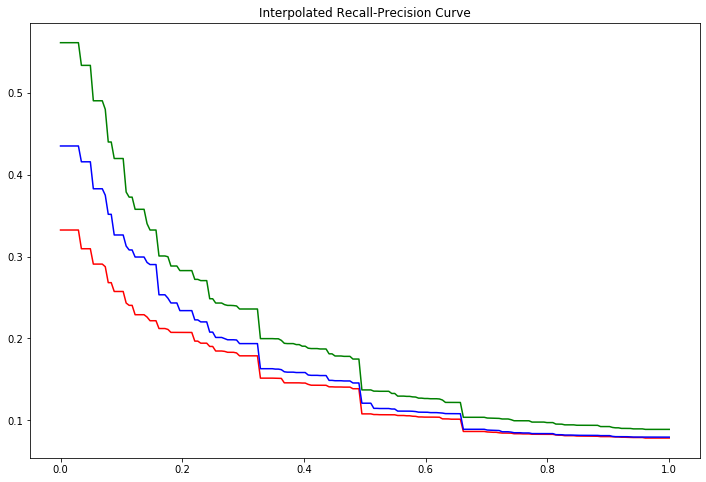

In [11]:
plt.figure(figsize=(12,8))
plt.title("Interpolated Recall-Precision Curve")
plt.plot(cp_results["recall_axis"], cp_results["precision_axis"], color="red")
plt.plot(pre_results["recall_axis"], pre_results["precision_axis"], color="blue")
plt.plot(tra_results["recall_axis"], tra_results["precision_axis"], color="green")

# Mean Average Precision
### Equivalent to Area Under the PR curve in this case because of interpolation

In [14]:
print("CellProfiler: \t\t", np.mean(cp_results["precision_axis"]))
print("Pre-trained features: \t", np.mean(pre_results["precision_axis"]))
print("Trained Network: \t", np.mean(tra_results["precision_axis"]))

CellProfiler: 		 0.14595358550995652
Pre-trained features: 	 0.16690131636025887
Trained Network: 	 0.20193224850689906
